Hybrid RMSE (Open): 6.5352
Hybrid RMSE (Close): 10.0302


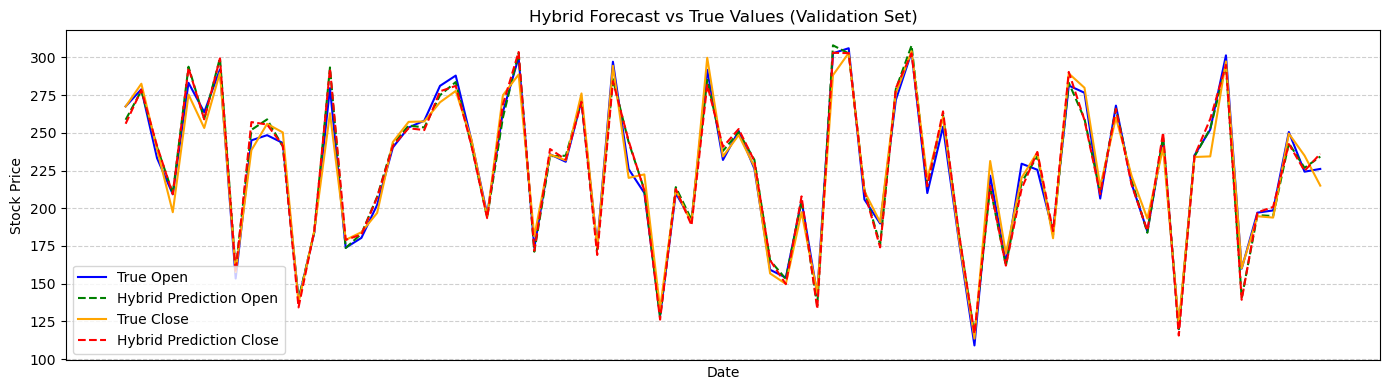

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split

# Load model predictions
lstm_preds = np.load("predictions_rnn_stock.npy")
transformer_preds = np.load("predictions_transformer_stock.npy")
liquidml_preds = np.load("predictions_liquid_stock.npy")  # shape: (385, 2)

# Load test data (true labels)
df_test = pd.read_excel('Tesla_Stock.xlsx')  # Replace with your correct filename
y_test = df_test[['Open', 'Close']].values[-385:]  # shape: (385, 2)

# Align prediction lengths
min_len = min(len(lstm_preds), len(transformer_preds), len(liquidml_preds))
lstm_preds = lstm_preds[:min_len]
transformer_preds = transformer_preds[:min_len]
liquidml_preds = liquidml_preds[:min_len]
y_test = y_test[-min_len:]

# Stack all predictions into one feature set for the meta-model
X_meta = np.hstack((lstm_preds, transformer_preds, liquidml_preds))  # shape: (min_len, 6)

# Split the meta-features into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_meta, y_test, test_size=0.2, random_state=42)

# Train meta-model
meta_model = RandomForestRegressor(random_state=42)
meta_model.fit(X_train, y_train)

# Predict on validation set
meta_preds = meta_model.predict(X_val)

# Evaluate performance
rmse_open = sqrt(mean_squared_error(y_val[:, 0], meta_preds[:, 0]))
rmse_close = sqrt(mean_squared_error(y_val[:, 1], meta_preds[:, 1]))
print(f"Hybrid RMSE (Open): {rmse_open:.4f}")
print(f"Hybrid RMSE (Close): {rmse_close:.4f}")

# Plot: comparing only the validation set
date_index = df_test.index[-min_len:][X_val.shape[0]*-1:]  # Get last N dates matching y_val size

plt.figure(figsize=(14, 4))
plt.plot(date_index, y_val[:, 0], label='True Open', color='blue')
plt.plot(date_index, meta_preds[:, 0], '--', label='Hybrid Prediction Open', color='green')
plt.plot(date_index, y_val[:, 1], label='True Close', color='orange')
plt.plot(date_index, meta_preds[:, 1], '--', label='Hybrid Prediction Close', color='red')
plt.title("Hybrid Forecast vs True Values (Validation Set)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks([])  # This removes x-axis tick labels
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("hybrid_stock.png", dpi=300, bbox_inches='tight')
plt.show()

Hybrid RMSE (Open): 18.5474
Hybrid RMSE (Close): 22.6013


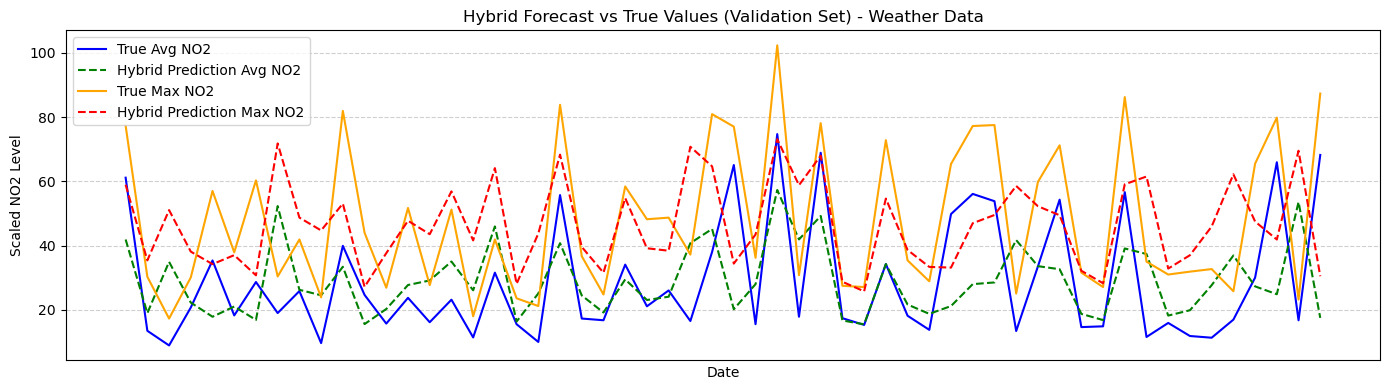

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split

# Load model predictions
lstm_preds = np.load("predictions_rnn_weather.npy")
transformer_preds = np.load("predictions_transformer_weather.npy")
liquidml_preds = np.load("predictions_liquid_weather.npy")  # shape: (385, 2)

# Load test data (true labels)
df_test = pd.read_excel('weatheraqdataset.xlsx') 
df_weather = df_test[["avg_nitrogen_dioxide", "max_nitrogen_dioxide"]].values[-278:]
# Replace with your correct filename
# y_test = df_test[['Open', 'Close']].values[-385:]  # shape: (385, 2)

# Align prediction lengths
min_len = min(len(lstm_preds), len(transformer_preds), len(liquidml_preds))
lstm_preds = lstm_preds[:min_len]
transformer_preds = transformer_preds[:min_len]
liquidml_preds = liquidml_preds[:min_len]
y_test = y_test[-min_len:]

# Stack all predictions into one feature set for the meta-model
X_meta = np.hstack((lstm_preds, transformer_preds, liquidml_preds))  # shape: (min_len, 6)

# Split the meta-features into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_meta, y_test, test_size=0.2, random_state=42)

# Train meta-model
meta_model = RandomForestRegressor(random_state=42)
meta_model.fit(X_train, y_train)

# Predict on validation set
meta_preds = meta_model.predict(X_val)

# Evaluate performance
rmse_open = sqrt(mean_squared_error(y_val[:, 0], meta_preds[:, 0]))
rmse_close = sqrt(mean_squared_error(y_val[:, 1], meta_preds[:, 1]))
print(f"Hybrid RMSE (Open): {rmse_open:.4f}")
print(f"Hybrid RMSE (Close): {rmse_close:.4f}")

# Plot: comparing only the validation set
date_index = df_test.index[-min_len:][X_val.shape[0]*-1:]  # Get last N dates matching y_val size

plt.figure(figsize=(14, 4))
plt.plot(date_index, y_val[:, 0], label='True Avg NO2', color='blue')
plt.plot(date_index, meta_preds[:, 0], '--', label='Hybrid Prediction Avg NO2', color='green')
plt.plot(date_index, y_val[:, 1], label='True Max NO2', color='orange')
plt.plot(date_index, meta_preds[:, 1], '--', label='Hybrid Prediction Max NO2', color='red')
plt.title("Hybrid Forecast vs True Values (Validation Set) - Weather Data")
plt.xlabel("Date")
plt.ylabel("Scaled NO2 Level")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks([])
plt.tight_layout()
plt.savefig("hybrid_weather.png", dpi=300, bbox_inches='tight')
plt.show()